# Avaliação 2

### Questão 3
Utilizando a base (https://www.kaggle.com/thesiff/premierleague1819) execute os algoritmos de clusterização citados a seguir e compare os resultados.
* Execute os algoritmos de agrupamento K-Means e Hierárquico;
* Escolha 5 diferentes valores de K;
* Varie o parâmetro (teste 2 tipos) de Linkage do Hierárquico com os mesmos valores de K escolhidos anteriormente;
* Faça uma comparação entre os 2 resultados anteriores, utilizando uma medida de avaliação própria para clusterização. 

__OBS__: Utilize validação cruzada com 10 folds estratificada e fixe o random_state.

#### Pré-processamento

É dado início ao pré-processamento, importando as bibliotecas necessárias e instanciando os databases forneceidos através do pandas.

Vale lembrar que __df__ é a variável que representa o dataframe da PremierLeague.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from sklearn.datasets import load_files
from sklearn.datasets import make_blobs
import re
from mpl_toolkits import mplot3d
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering

df = pd.read_csv("data/q2_epl_1819.csv",sep=",")

#### Eliminando colunas inutilizadas

Algumas colunas apresentam valores decimais importantes entre aspas. Quando maiores que 1000, utilizam a vírgula como separador de milhar. Sendo assim, é necessário realizar o *cast* desses valores para decimais, e, para isso, é necessário fazer a remoção das vírgulas. 

As colunas que apresentam esse problema são:

* __attack_passes__
* __attack_passes_long__
* __attack_passes_back__
* __defence_clearances__

##### attack_passes

In [2]:
df['attack_passes']

0     26,581
1     23,638
2     25,070
3     21,295
4     20,805
5     19,202
6     16,618
7     16,494
8     17,219
9     16,358
10    15,462
11    15,243
12    13,490
13    15,943
14    13,011
15    14,297
16    14,109
17    10,226
18    17,699
19    15,902
Name: attack_passes, dtype: object

In [3]:
for i in df['attack_passes']:
    df['attack_passes'] = df['attack_passes'].replace(i,float(i.replace(',','')))

In [4]:
df['attack_passes']

0     26581.0
1     23638.0
2     25070.0
3     21295.0
4     20805.0
5     19202.0
6     16618.0
7     16494.0
8     17219.0
9     16358.0
10    15462.0
11    15243.0
12    13490.0
13    15943.0
14    13011.0
15    14297.0
16    14109.0
17    10226.0
18    17699.0
19    15902.0
Name: attack_passes, dtype: float64

##### attack_passes_long

In [5]:
df['attack_passes_long']

0     1,814
1     2,250
2     1,774
3     2,267
4     2,062
5     2,242
6     2,552
7     2,310
8     2,335
9     2,315
10    2,437
11    2,259
12    2,680
13    1,932
14    2,898
15    2,394
16    2,623
17    2,513
18    2,417
19    2,603
Name: attack_passes_long, dtype: object

In [6]:
for i in df['attack_passes_long']:
    df['attack_passes_long'] = df['attack_passes_long'].replace(i,float(i.replace(',','')))

In [7]:
df['attack_passes_long']

0     1814.0
1     2250.0
2     1774.0
3     2267.0
4     2062.0
5     2242.0
6     2552.0
7     2310.0
8     2335.0
9     2315.0
10    2437.0
11    2259.0
12    2680.0
13    1932.0
14    2898.0
15    2394.0
16    2623.0
17    2513.0
18    2417.0
19    2603.0
Name: attack_passes_long, dtype: float64

##### attack_passes_back

In [8]:
df['attack_passes_back']

0     4,240
1     3,416
2     3,874
3     3,191
4     3,102
5     2,634
6     2,515
7     2,362
8     2,593
9     2,273
10    2,314
11    2,233
12    1,999
13    2,249
14    2,046
15    2,040
16    2,072
17    1,418
18    2,750
19    2,492
Name: attack_passes_back, dtype: object

In [9]:
for i in df['attack_passes_back']:
    df['attack_passes_back'] = df['attack_passes_back'].replace(i,float(i.replace(',','')))

In [10]:
df['attack_passes_back']

0     4240.0
1     3416.0
2     3874.0
3     3191.0
4     3102.0
5     2634.0
6     2515.0
7     2362.0
8     2593.0
9     2273.0
10    2314.0
11    2233.0
12    1999.0
13    2249.0
14    2046.0
15    2040.0
16    2072.0
17    1418.0
18    2750.0
19    2492.0
Name: attack_passes_back, dtype: float64

##### defence_clearances

In [11]:
df['defence_clearances']

0       543
1       639
2       593
3       770
4       762
5       785
6       824
7       825
8       945
9       855
10      956
11      940
12    1,120
13    1,019
14    1,080
15    1,068
16      921
17      978
18      971
19      658
Name: defence_clearances, dtype: object

In [12]:
for i in df['defence_clearances']:
    i = str(i)
    df['defence_clearances'] = df['defence_clearances'].replace(i,float(i.replace(',','')))

In [13]:
df['defence_clearances']

0      543.0
1      639.0
2      593.0
3      770.0
4      762.0
5      785.0
6      824.0
7      825.0
8      945.0
9      855.0
10     956.0
11     940.0
12    1120.0
13    1019.0
14    1080.0
15    1068.0
16     921.0
17     978.0
18     971.0
19     658.0
Name: defence_clearances, dtype: float64

#### Procurando por dados duplicados

Para dar sequência, é necessário que se tenha a garantia de que não há dados duplicados.

In [14]:
df.duplicated().sum()

0

#### Procurando valores nulos

Igualmente importante, é interessante analisar e avaliar a existência de valores nulos.

In [15]:
df.isnull().sum().sum()

0

#### Eliminando colunas inutilizadas

As colunas *__Team__* e *__category__* são textuais e não vão agregar à análise do IA. Desta forma entendeu-se que podem ser excluídas sem causar maiores falhas.

In [16]:
df = df.drop(columns=['Team','category'])

#### Normalizando dados

Para reduzir redundância, aumentar a integridade e o desempenho da análise dos dados estudados, é importante realizar sua normalização, que é feita conforme a célula abaixo.

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

#### Executando o KMeans

Aqui cabe a análise do algoritmo KMeans com 5 valores para K: 3, 5, 7, 9 e 11.

##### 3 CLUSTERS

Clusters: 3
Silhueta média: 0.61.



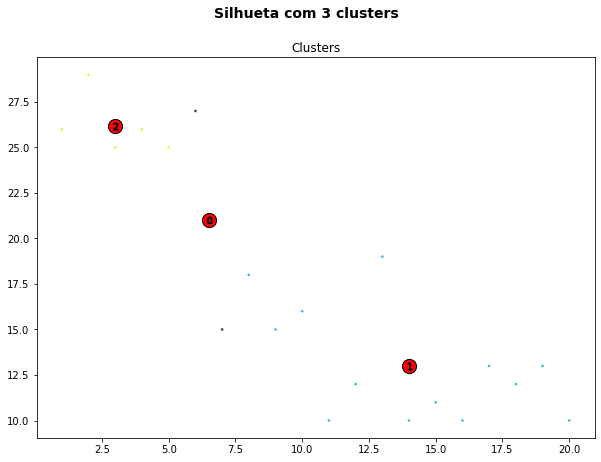

In [18]:
nc = 3

fig, (ax2) = plt.subplots(1)
fig.set_size_inches(10,7)

c = KMeans(n_clusters=nc, random_state=42)
labels = c.fit_predict(df)

s = silhouette_score(df, labels)
print("Clusters: %d\nSilhueta média: %.2f.\n" %(nc,s))

sample_silhouette_values = silhouette_samples(df, labels)

colors = cm.nipy_spectral(labels.astype(float) / nc)
ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

centers = c.cluster_centers_

ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="red", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("Clusters")

plt.suptitle(("Silhueta com %d clusters" %(nc)),
                 fontsize=14, fontweight='bold')

plt.show()

##### 5 CLUSTERS

Clusters: 5
Silhueta média: 0.51.



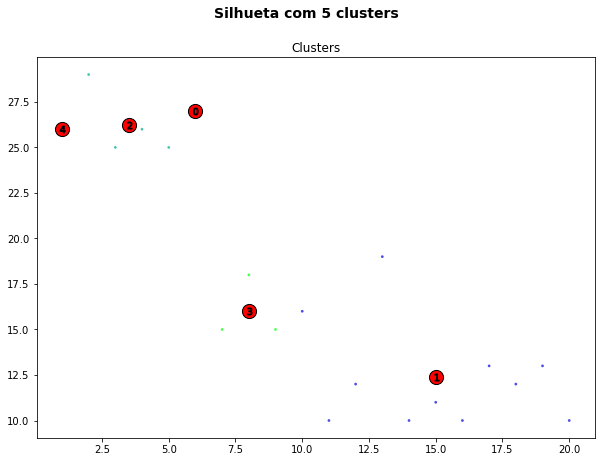

In [19]:
nc = 5

fig, (ax2) = plt.subplots(1)
fig.set_size_inches(10,7)

c = KMeans(n_clusters=nc, random_state=42)
labels = c.fit_predict(df)

s = silhouette_score(df, labels)
print("Clusters: %d\nSilhueta média: %.2f.\n" %(nc,s))

sample_silhouette_values = silhouette_samples(df, labels)

colors = cm.nipy_spectral(labels.astype(float) / nc)
ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

centers = c.cluster_centers_

ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="red", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("Clusters")

plt.suptitle(("Silhueta com %d clusters" %(nc)),
                 fontsize=14, fontweight='bold')

plt.show()

##### 7 CLUSTERS

Clusters: 7
Silhueta média: 0.46.



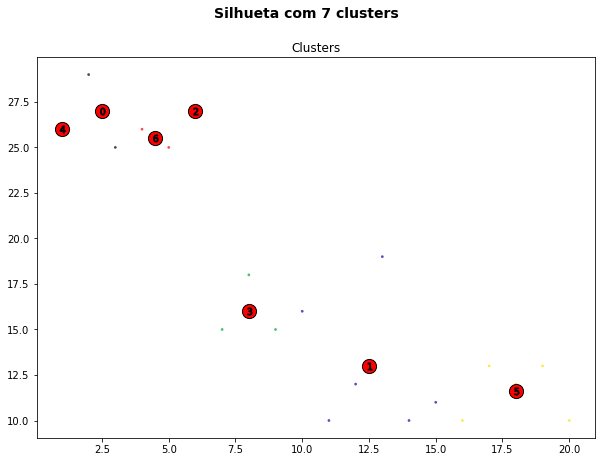

In [20]:
nc = 7

fig, (ax2) = plt.subplots(1)
fig.set_size_inches(10,7)

c = KMeans(n_clusters=nc, random_state=42)
labels = c.fit_predict(df)

s = silhouette_score(df, labels)
print("Clusters: %d\nSilhueta média: %.2f.\n" %(nc,s))

sample_silhouette_values = silhouette_samples(df, labels)

colors = cm.nipy_spectral(labels.astype(float) / nc)
ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

centers = c.cluster_centers_

ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="red", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("Clusters")

plt.suptitle(("Silhueta com %d clusters" %(nc)),
                 fontsize=14, fontweight='bold')

plt.show()

##### 9 CLUSTERS

Clusters: 9
Silhueta média: 0.53.



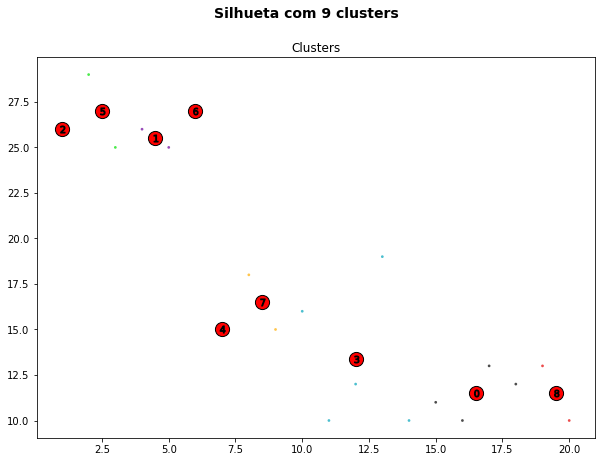

In [21]:
nc = 9

fig, (ax2) = plt.subplots(1)
fig.set_size_inches(10,7)

c = KMeans(n_clusters=nc, random_state=42)
labels = c.fit_predict(df)

s = silhouette_score(df, labels)
print("Clusters: %d\nSilhueta média: %.2f.\n" %(nc,s))

sample_silhouette_values = silhouette_samples(df, labels)

colors = cm.nipy_spectral(labels.astype(float) / nc)
ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

centers = c.cluster_centers_

ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="red", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("Clusters")

plt.suptitle(("Silhueta com %d clusters" %(nc)),
                 fontsize=14, fontweight='bold')

plt.show()

##### 11 CLUSTERS

Clusters: 11
Silhueta média: 0.42.



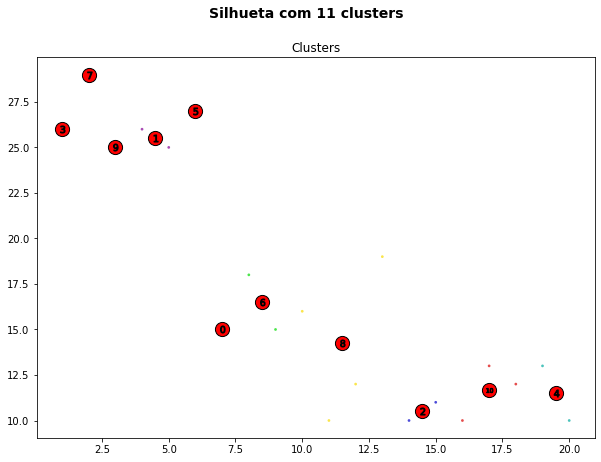

In [22]:
nc = 11

fig, (ax2) = plt.subplots(1)
fig.set_size_inches(10,7)

c = KMeans(n_clusters=nc, random_state=42)
labels = c.fit_predict(df)

s = silhouette_score(df, labels)
print("Clusters: %d\nSilhueta média: %.2f.\n" %(nc,s))

sample_silhouette_values = silhouette_samples(df, labels)

colors = cm.nipy_spectral(labels.astype(float) / nc)
ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

centers = c.cluster_centers_

ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="red", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("Clusters")

plt.suptitle(("Silhueta com %d clusters" %(nc)),
                 fontsize=14, fontweight='bold')

plt.show()

#### Executando o Hierárquico

Aqui cabe a análise do algoritmo Hierárquico com os mesmos 5 valores para K: 3, 5, 7, 9 e 11.

Para cada valor de K serão executados 
* __ward__
* __average__

##### 3 CLUSTERS

Silhouette Score: 0.69


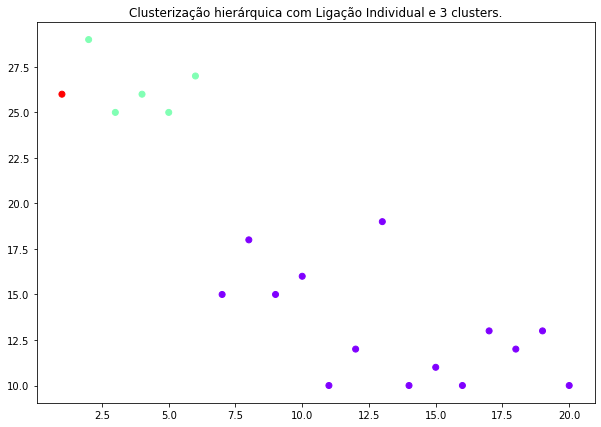

In [23]:
nc = 3

cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='ward')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))

Silhouette Score: 0.69


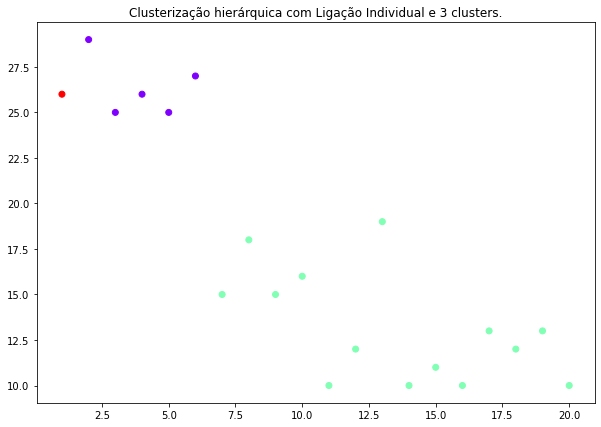

In [24]:
cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='average')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))

##### 5 CLUSTERS

Silhouette Score: 0.51


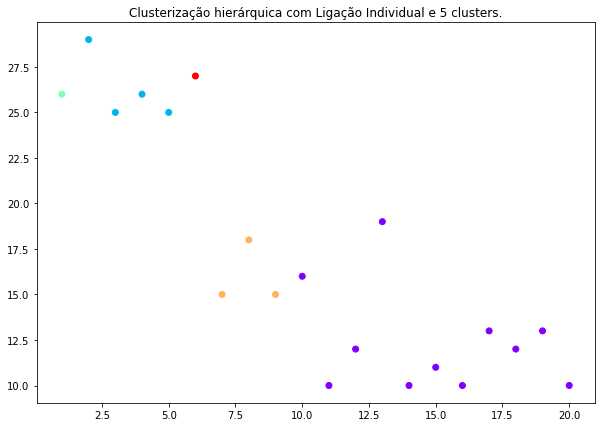

In [25]:
nc = 5

cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='ward')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))

Silhouette Score: 0.51


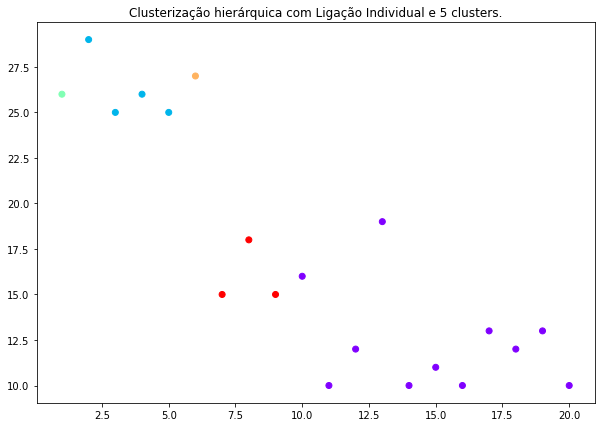

In [26]:
cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='average')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))

##### 7 CLUSTER

Silhouette Score: 0.47


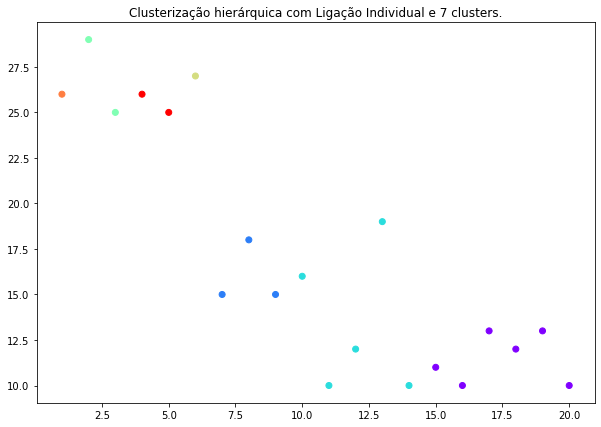

In [27]:
nc = 7

cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='ward')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))

Silhouette Score: 0.45


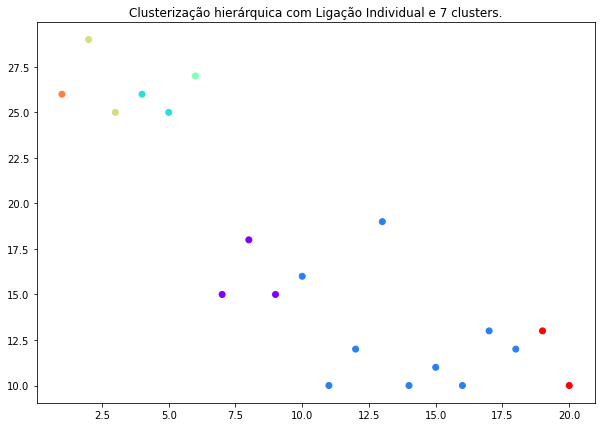

In [28]:
cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='average')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))

##### 9 CLUSTERS

Silhouette Score: 0.53


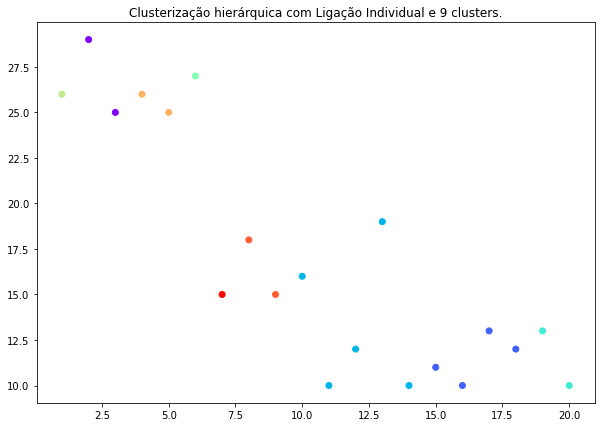

In [29]:
nc = 9

cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='ward')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))

Silhouette Score: 0.53


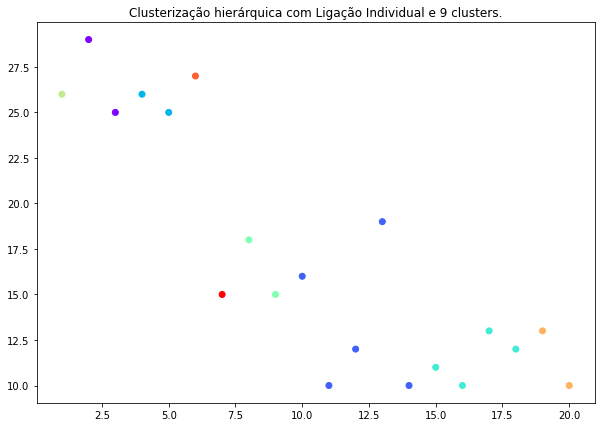

In [30]:
cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='average')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))

##### 11 CLUSTERS

Silhouette Score: 0.40


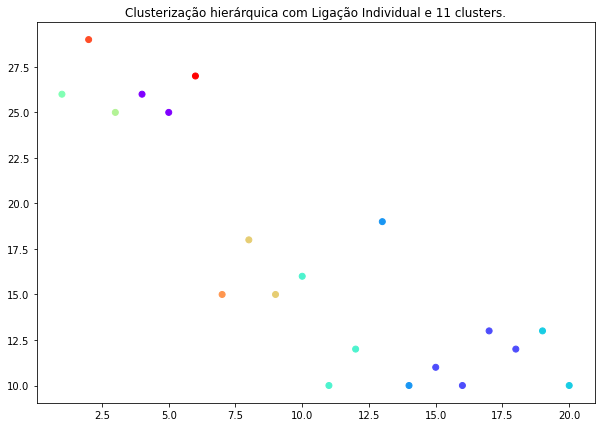

In [31]:
nc = 11

cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='ward')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))

Silhouette Score: 0.44


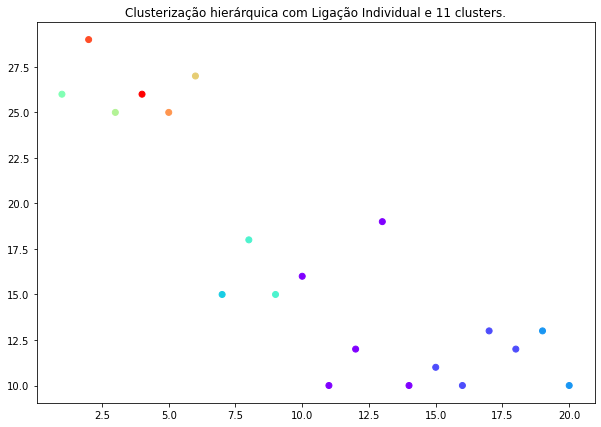

In [32]:
cluster = AgglomerativeClustering(n_clusters=nc, affinity='euclidean', linkage='average')
label = cluster.fit_predict(df)
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clusterização hierárquica com Ligação Individual e %d clusters." %(nc))

print("Silhouette Score: %.2f"%(silhouette_score(df, label)))